<a href="https://colab.research.google.com/github/RostislavB74/NN10_1/blob/main/hw10-200324_1500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Частина перша***


В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
import itertools
%matplotlib inline
from keras import optimizers
from keras.optimizers import Adam, RMSprop, SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
num_classes = 10
num_features = 28*28

learning_rate = 0.0001
training_steps = 3000
batch_size = 512
display_step = 100

n_hidden_1 = 128
n_hidden_2 = 256
n_hidden_3 = 512
n_hidden_4 = 1024

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [6]:
x_train.shape

(60000, 28, 28, 1)

## ***Рішення***

In [7]:

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [9]:

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
model.save('1_model')

In [11]:
import time

start_time = time.time()
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")




Epoch 1/5
1500/1500 [==============================] - 11s 5ms/step - loss: 0.4252 - accuracy: 0.8488 - val_loss: 0.3141 - val_accuracy: 0.8866
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2752 - accuracy: 0.9003 - val_loss: 0.3075 - val_accuracy: 0.8878
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2287 - accuracy: 0.9164 - val_loss: 0.2584 - val_accuracy: 0.9053
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1953 - accuracy: 0.9284 - val_loss: 0.2364 - val_accuracy: 0.9134
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1670 - accuracy: 0.9390 - val_loss: 0.2239 - val_accuracy: 0.9174
Training time:  42.62182021141052 seconds


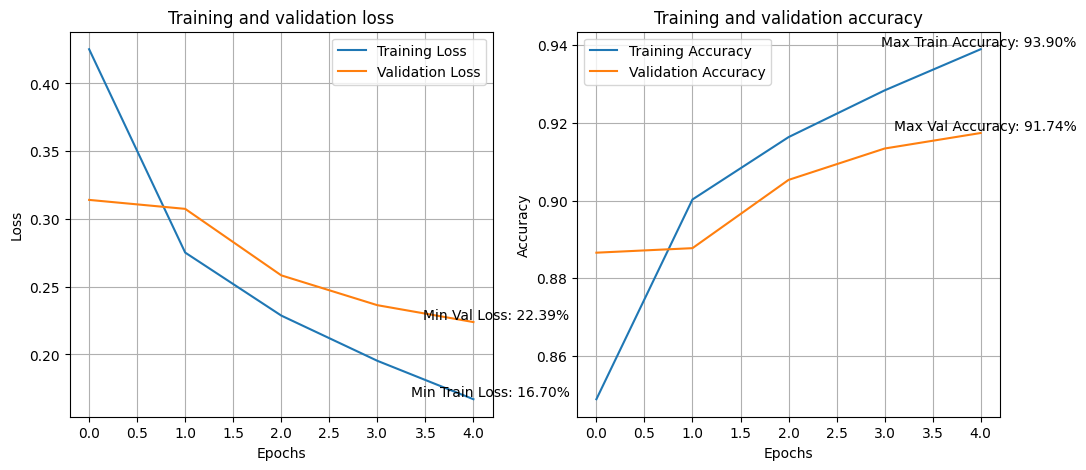

In [12]:
plt.figure(figsize=(12, 5))
history=his
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']), f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']), f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.show()

Модель 2


In [13]:
model_2=keras.Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

In [14]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model_2.save('model_2')

In [16]:
import time
start_time = time.time()
his_2 = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")

Epoch 1/5
1500/1500 [==============================] - 9s 4ms/step - loss: 0.5224 - accuracy: 0.8072 - val_loss: 0.3919 - val_accuracy: 0.8574
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3309 - accuracy: 0.8794 - val_loss: 0.3110 - val_accuracy: 0.8848
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2796 - accuracy: 0.8975 - val_loss: 0.3011 - val_accuracy: 0.8882
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2508 - accuracy: 0.9078 - val_loss: 0.2737 - val_accuracy: 0.9029
Epoch 5/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2236 - accuracy: 0.9179 - val_loss: 0.2758 - val_accuracy: 0.8985
Training time:  42.50520300865173 seconds


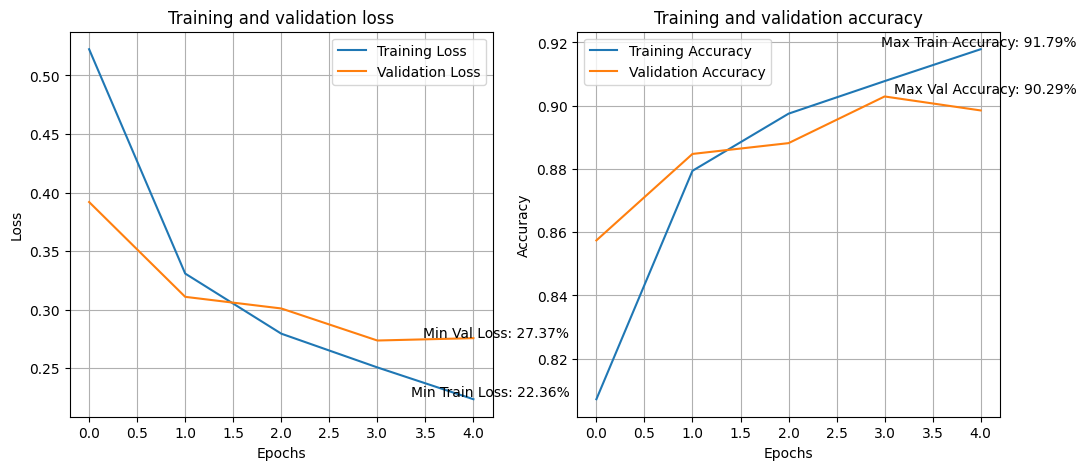

In [17]:
plt.figure(figsize=(12, 5))
history=his_2
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']), f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']), f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.show()


In [18]:
import time
model= keras.models.load_model("model_2")
start_time = time.time()
his_3 = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)
end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5211 - accuracy: 0.8071 - val_loss: 0.3802 - val_accuracy: 0.8593
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3311 - accuracy: 0.8794 - val_loss: 0.3052 - val_accuracy: 0.8894
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2816 - accuracy: 0.8956 - val_loss: 0.3002 - val_accuracy: 0.8889
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2492 - accuracy: 0.9069 - val_loss: 0.2808 - val_accuracy: 0.8972
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2240 - accuracy: 0.9162 - val_loss: 0.2799 - val_accuracy: 0.8979
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2022 - accuracy: 0.9259 - val_loss: 0.2496 - val_accuracy: 0.9092
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1838 - accuracy: 0.9322 - val_loss: 0.2747 - val_accuracy:

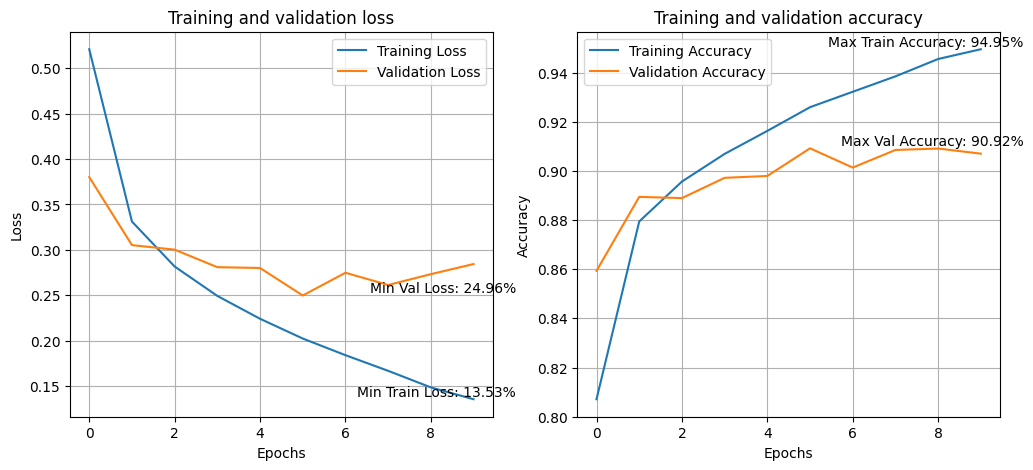

In [19]:
plt.figure(figsize=(12, 5))
history=his_3
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']), f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']), f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.show()

In [20]:
model_3=keras.Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    Flatten(),
    Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.1),
    Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.1),
    Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [21]:
model_3.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [22]:
model_3.save('3_model')

In [23]:
from keras.callbacks import ReduceLROnPlateau
import time
model= keras.models.load_model("3_model")
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
start_time = time.time()
his_33 = model.fit(x_train, y_train_cat,
                       batch_size=32,
                       epochs=10,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])
end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.1995 - accuracy: 0.5511 - val_loss: 0.1236 - val_accuracy: 0.7254 - lr: 1.0000e-04
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1186 - accuracy: 0.7432 - val_loss: 0.1019 - val_accuracy: 0.7820 - lr: 1.0000e-04
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1009 - accuracy: 0.7832 - val_loss: 0.0930 - val_accuracy: 0.7993 - lr: 1.0000e-04
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0913 - accuracy: 0.8064 - val_loss: 0.0845 - val_accuracy: 0.8201 - lr: 1.0000e-04
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0844 - accuracy: 0.8227 - val_loss: 0.0785 - val_accuracy: 0.8393 - lr: 1.0000e-04
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0791 - accuracy: 0.8369 - val_loss: 0.0749 - val_accuracy: 0.8434 - lr: 1.0000e-04
Epoch 7/10
1500/1500 [===========

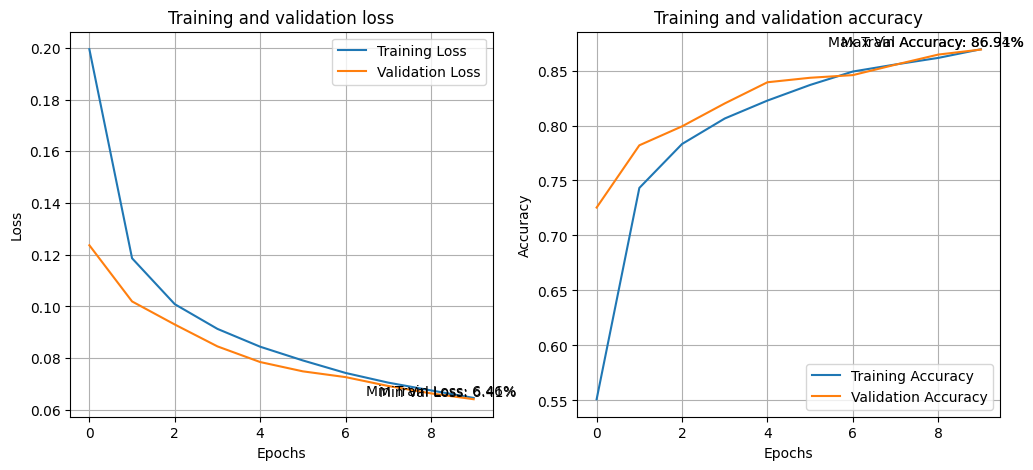

In [24]:
plt.figure(figsize=(12, 5))
history=his_33
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']), f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']), f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.show()

## ***Тестування***

In [25]:
test_loss, test_acc= model.evaluate(x_test, y_test_cat)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0662 - accuracy: 0.8650
Test accuracy: 0.8650000095367432
Test loss: 0.06620094180107117


1/1 [==============================] - 0s 499ms/step
[[1.7340043e-09 1.4225039e-08 1.7211601e-09 6.4167352e-08 1.0656719e-09
  2.2162747e-06 3.0761986e-09 9.9999619e-01 1.2457269e-07 1.2509562e-06]]
Предмет що розпізнаний: Sneaker


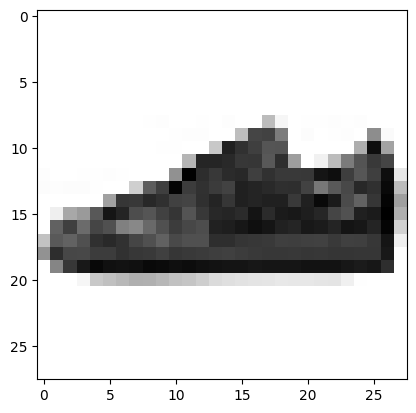

In [26]:
n=22
x=np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'Предмет що розпізнаний: {class_names[np.argmax(res)]}')
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [27]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 6s 3ms/step


In [28]:
class_names[np.argmax(predictions[22])]

'Coat'

In [29]:
class_names[y_train[22]]

'Coat'

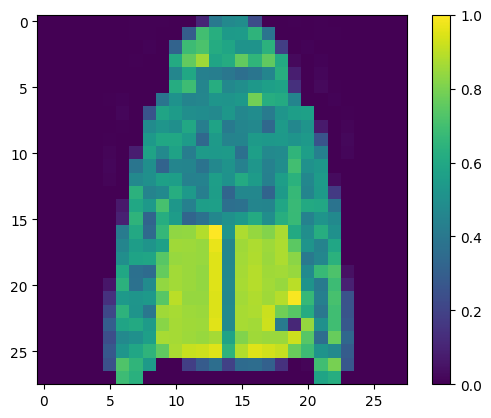

In [30]:
plt.figure()
plt.imshow(x_train[22])
plt.colorbar()
plt.grid(False)

In [31]:
class_names[np.argmax(predictions[22])]

'Coat'

In [32]:
predictions_all = model.predict(x_test)
predictions_all = np.argmax(predictions_all, axis=1)

predicted_class_names = [class_names[label] for label in predictions_all]
true_class_names = [class_names[label] for label in y_test]

313/313 [==============================] - 1s 2ms/step


In [33]:
from tabulate import tabulate

table_data = []
for i in range(30):
    predicted_class = predicted_class_names[i]
    true_class = true_class_names[i]
    if predicted_class != true_class:
        table_data.append([f"\033[91m{predicted_class}\033[0m", true_class])
    else:
        table_data.append([predicted_class, true_class])

print(tabulate(table_data, headers=["Predicted Class", "True Class"], tablefmt="fancy_grid"))


╒═══════════════════╤══════════════╕
│ Predicted Class   │ True Class   │
╞═══════════════════╪══════════════╡
│ Ankle boot        │ Ankle boot   │
├───────────────────┼──────────────┤
│ Pullover          │ Pullover     │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│ Sneaker           │ Sneaker      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│

In [34]:
mask=predictions_all==y_test
print(mask[:30])
x_false=x_test[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True False
  True False  True  True  True False]
(1350, 28, 28, 1)


In [35]:
print(f'Кількість помилкових значень: {len(x_false)}')

Кількість помилкових значень: 1350


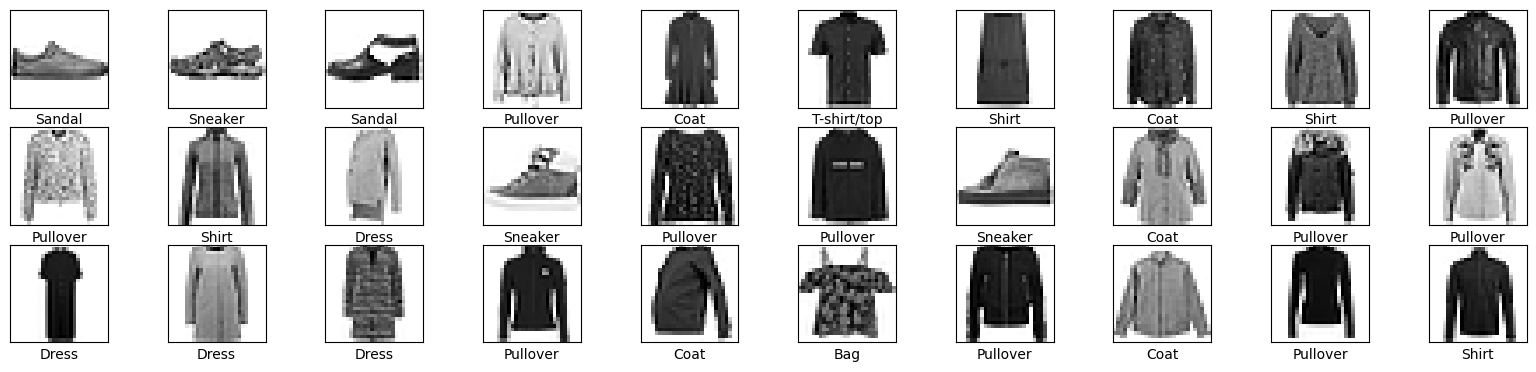

In [36]:
plt.figure(figsize=(20,15))
for i in range(30):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [37]:
import numpy as np

mask = predictions_all != y_test

x_false = x_test[mask]
y_false = y_test[mask]

false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"{class_names[digit]}: {count} помилкових класифікацій")

T-shirt/top: 206 помилкових класифікацій
Trouser: 34 помилкових класифікацій
Pullover: 143 помилкових класифікацій
Dress: 97 помилкових класифікацій
Coat: 236 помилкових класифікацій
Sandal: 49 помилкових класифікацій
Shirt: 474 помилкових класифікацій
Sneaker: 33 помилкових класифікацій
Bag: 22 помилкових класифікацій
Ankle boot: 56 помилкових класифікацій


In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[794   0  31  59   5   3  83   0  25   0]
 [  2 966   2  21   3   0   3   0   3   0]
 [  8   0 857  13  66   0  45   0  11   0]
 [ 11   9  20 903  22   0  26   0   9   0]
 [  1   0 112  40 764   0  71   0  12   0]
 [  0   0   0   2   0 951   0  34   1  12]
 [134   1 147  36 119   0 526   0  37   0]
 [  0   0   0   0   0  14   0 967   1  18]
 [  0   1   5   4   3   1   3   4 978   1]
 [  0   0   0   0   0   6   0  49   1 944]]


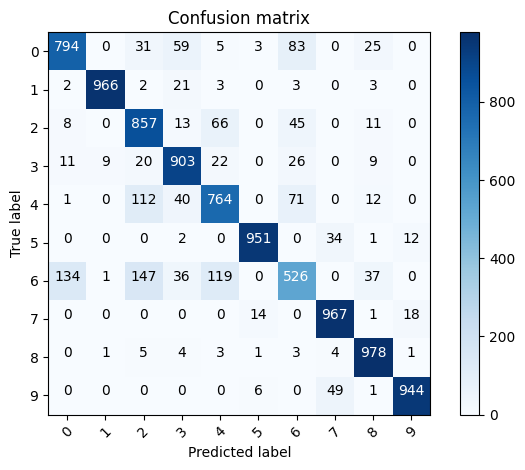

In [39]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=range(10))

# ***Частина друга***

​

В цій частині ми знову будемо працювати з датасетом fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.



Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.



Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

## Підготовка

In [40]:
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
import time
import keras

In [41]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [42]:

img_w = x_train.shape[1]

rgb_images_train = np.expand_dims(x_train, axis=-1)
rgb_images_train = np.repeat(rgb_images_train, 3, axis=-1)

rgb_images_validate = np.expand_dims(x_test, axis=-1)
rgb_images_validate = np.repeat(rgb_images_validate, 3, axis=-1)


print(x_train.shape, rgb_images_train.shape, rgb_images_validate.shape)

(60000, 28, 28) (60000, 28, 28, 3) (10000, 28, 28, 3)


In [43]:
import tensorflow as tf

new_height = 64
new_width = 64
x_train_resized = tf.image.resize(rgb_images_train, [new_height, new_width])
x_test_resized = tf.image.resize(rgb_images_validate, [new_height, new_width])


In [44]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [45]:
print(y_train_cat.shape)

(60000, 10)


## base_model

In [46]:
from keras import regularizers


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = Flatten()(base_model.output)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.1)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [48]:
model.save('base_01_1')

In [ ]:
import keras
from keras.callbacks import ReduceLROnPlateau
import time
model= keras.models.load_model("base_01_1")
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
start_time = time.time()
his_111= model.fit(x_train_resized, y_train_cat,
                       batch_size=32,
                       epochs=5,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])
end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")

Epoch 1/5
1497/1500 [============================>.] - ETA: 0s - loss: 1.9281 - accuracy: 0.7896

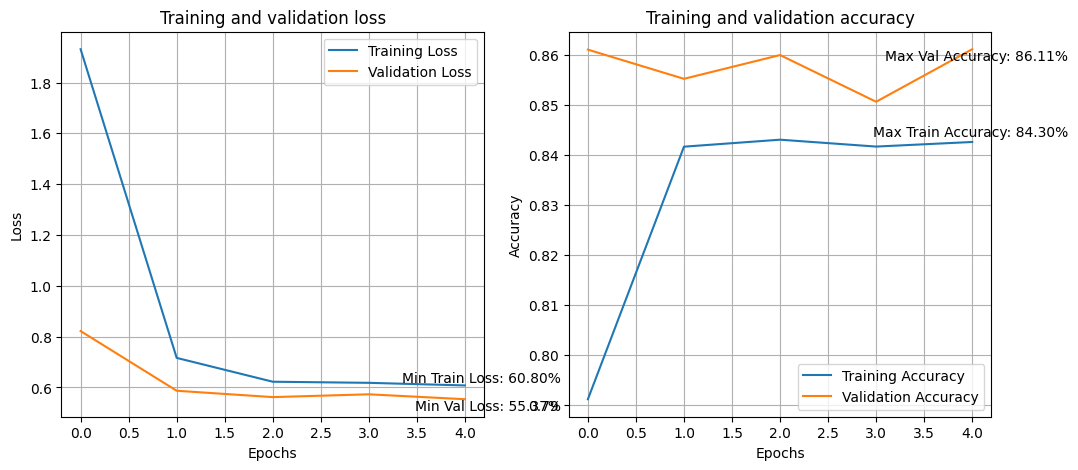

In [ ]:
plt.figure(figsize=(12, 5))
history=his_111
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']), f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='top', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']), f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='top', horizontalalignment='right')

plt.show()

## base_model_32

In [ ]:
base_model_32 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False




## base_model_64

In [ ]:
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = Flatten()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False




In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0  

In [ ]:
model.save('base_02_1')

In [ ]:
import keras
from keras.callbacks import ReduceLROnPlateau
import time
model= keras.models.load_model("base_02_1")
start_time = time.time()
his_64=model.fit(x_train_resized, y_train_cat, epochs=10, batch_size=32, validation_data=(x_test_resized, y_test_cat))

end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")
loss, accuracy = model.evaluate(x_test_resized, y_test_cat)
print("Test Accuracy:", accuracy)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 1.9241 - accuracy: 0.4778 - val_loss: 0.8091 - val_accuracy: 0.7232
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.9737 - accuracy: 0.6569 - val_loss: 0.6297 - val_accuracy: 0.7873
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8270 - accuracy: 0.7075 - val_loss: 0.6126 - val_accuracy: 0.7921
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.7638 - accuracy: 0.7296 - val_loss: 0.5903 - val_accuracy: 0.7930
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.7375 - accuracy: 0.7415 - val_loss: 0.5439 - val_accuracy: 0.8102
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.7204 - accuracy: 0.7445 - val_loss: 0.5437 - val_accuracy: 0.8159
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.7112 - accuracy: 0.7501 - val_loss: 0.5533 -

In [ ]:
loss, accuracy = model.evaluate(x_test_resized, y_test_cat)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 0.5358 - accuracy: 0.8333
Test Accuracy: 0.833299994468689


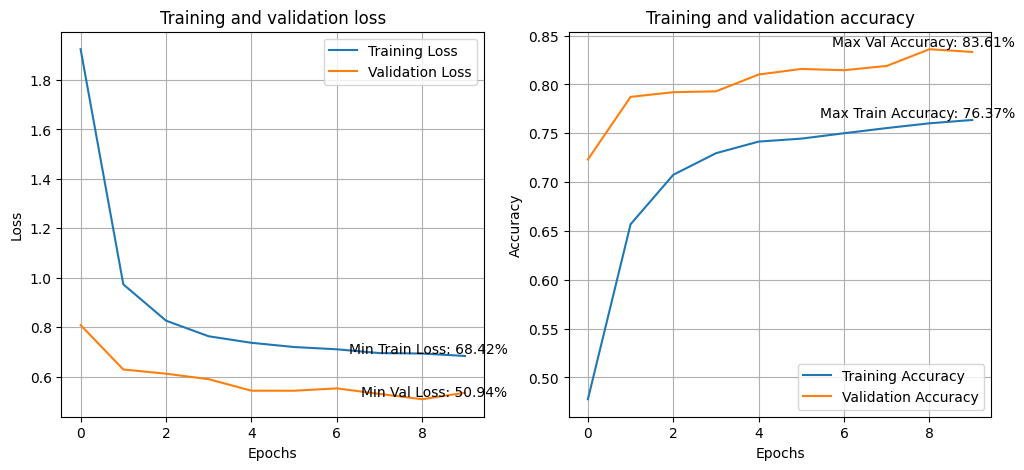

In [ ]:
plt.figure(figsize=(12, 5))
history=his_64
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']), f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']), f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.show()

In [ ]:
predictions = model.predict(x_test_resized)

predicted_classes = np.argmax(predictions, axis=1)

for i in range(10):
    print("Predicted class:", predicted_classes[i])
    print("True class:", np.argmax(y_test_cat[i]))


313/313 [==============================] - 5s 14ms/step
Predicted class: 9
True class: 9
Predicted class: 2
True class: 2
Predicted class: 1
True class: 1
Predicted class: 1
True class: 1
Predicted class: 6
True class: 6
Predicted class: 1
True class: 1
Predicted class: 4
True class: 4
Predicted class: 6
True class: 6
Predicted class: 5
True class: 5
Predicted class: 7
True class: 7


## Спроба підвищити якість

In [ ]:
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.applications import VGG16

base_model_11 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = Flatten()(base_model_11.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model_111 = Model(inputs=base_model_11.input, outputs=predictions)
for layer in base_model_11.layers:
    layer.trainable = False




In [ ]:

model_111.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model_111.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
model_111.save('model_111')

In [ ]:
import keras
from keras.callbacks import ReduceLROnPlateau
import time
model= keras.models.load_model("model_111")
start_time = time.time()
his_111=model.fit(x_train_resized, y_train_cat, epochs=10, batch_size=32, validation_data=(x_test_resized, y_test_cat))

end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")
loss, accuracy = model.evaluate(x_test_resized, y_test_cat)
print("Test Accuracy:", accuracy)

Epoch 1/10
1875/1875 [==============================] - 46s 21ms/step - loss: 2.0568 - accuracy: 0.4419 - val_loss: 0.6856 - val_accuracy: 0.7595
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8481 - accuracy: 0.6990 - val_loss: 0.5595 - val_accuracy: 0.8107
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.7545 - accuracy: 0.7411 - val_loss: 0.5646 - val_accuracy: 0.7751
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.7329 - accuracy: 0.7550 - val_loss: 0.4968 - val_accuracy: 0.8242
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.7154 - accuracy: 0.7636 - val_loss: 0.5043 - val_accuracy: 0.8343
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.7003 - accuracy: 0.7732 - val_loss: 0.5162 - val_accuracy: 0.8411
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6848 - accuracy: 0.7802 - val_loss: 0.5006 -

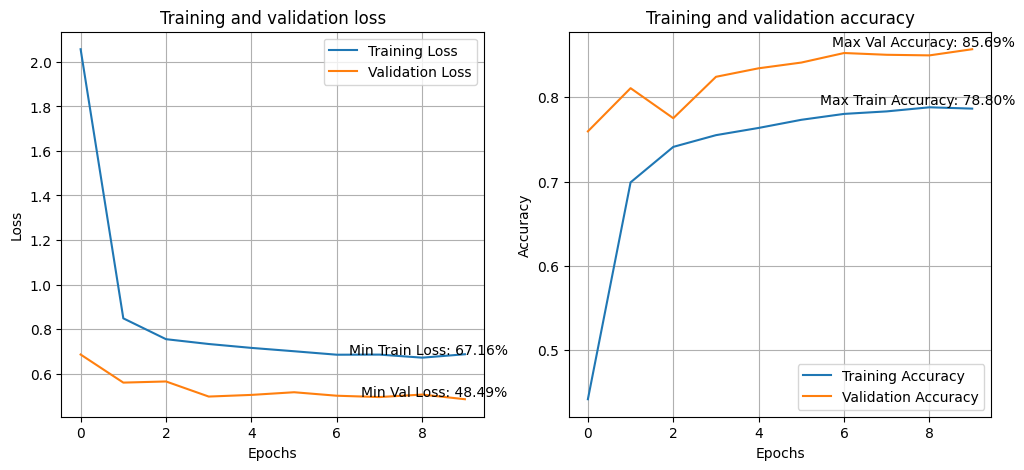

In [ ]:
plt.figure(figsize=(12, 5))
history=his_111
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']), f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']), f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.show()